100%|██████████| 133/133 [04:27<00:00,  2.01s/it]


MoJoFM 0.496
method-MoJoFM 0.526
field-MoJoFM 0.449


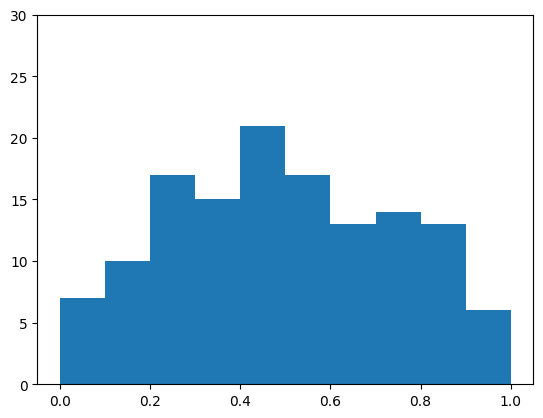

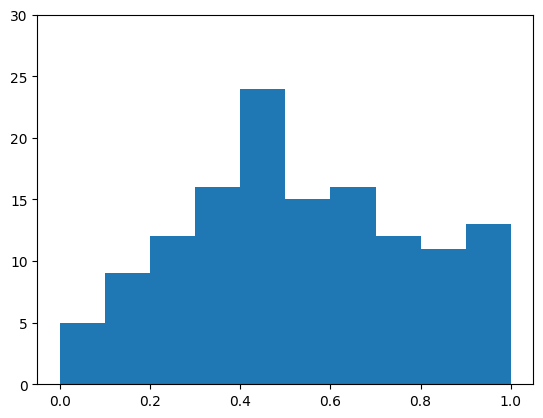

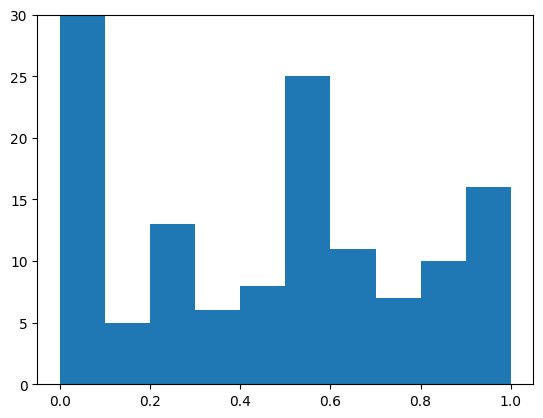

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from god_class import DictHandler
from cluster import ClusterSeparate
from baseline1 import Baseline1
import show_result as sr


all_mpnet_base_v2_model_name = 'sentence-transformers/all-mpnet-base-v2'
cache_path0 = 'cache_time_all-mpnet-base-v2.json'

dict_handler = DictHandler('GodClassRefactorDictionary.csv')

good_classes = dict_handler.get_classes()
m_data = []
mm_data = []
fm_data = []
for c in tqdm(good_classes):
    cluster_separate = ClusterSeparate(c, model_name=all_mpnet_base_v2_model_name, cache_path=cache_path0)
    cluster_separate.separate_to_group()
    cluster_separate.split_group_by_position()
    cluster_separate.merge_adjacent_single_method()
    cluster_separate.merge_separate_group()
    cluster_separate.handle_fields()
    m_data.append(cluster_separate.get_mojofm(field=True))
    mm_data.append(cluster_separate.get_mojofm(field=False))
    fm_data.append(cluster_separate.get_field_mojofm())
sr.draw_mojofm(m_data, title='MoJoFM')
sr.draw_mojofm(mm_data, title='method-MoJoFM')
sr.draw_mojofm(fm_data, title='field-MoJoFM')
plt.show()

above is ClassSplitter's result on 133 God class database
(all/method only/field only)

100%|██████████| 133/133 [07:46<00:00,  3.51s/it]


wins: 83, ties: 17, losses: 33, huge rise(40): 64 , out of total number 133
compare MoJoFM: 0.334 to 0.496
t-statistic: -5.5047064942518995
p-value: 8.754323696313795e-08
wins: 82, ties: 17, losses: 34, huge rise(40): 68 , out of total number 133
method-compare MoJoFM: 0.325 to 0.526
t-statistic: -6.780875152191364
p-value: 7.794948201206006e-11
wins: 40, ties: 56, losses: 37, huge rise(40): 30 , out of total number 133
field-compare MoJoFM: 0.441 to 0.449
t-statistic: -0.18381046074026605
p-value: 0.8543032500938792


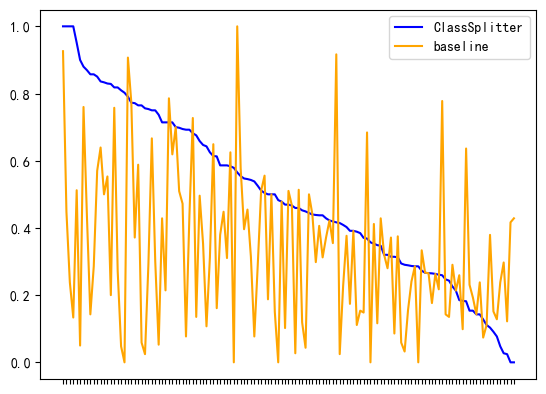

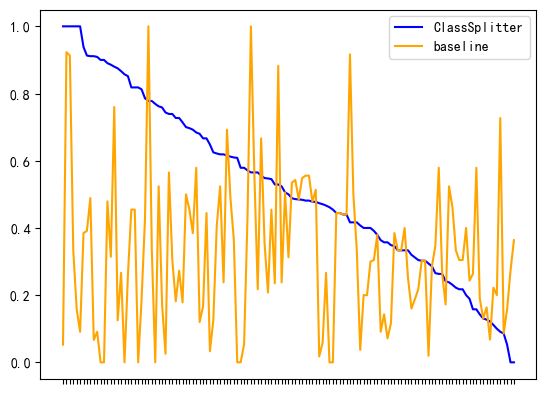

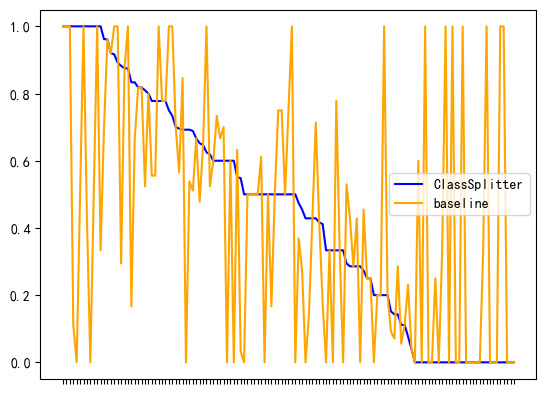

In [2]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from god_class import DictHandler
from cluster import ClusterSeparate
from baseline1 import Baseline1
import show_result as sr


all_mpnet_base_v2_model_name = 'sentence-transformers/all-mpnet-base-v2'
cache_path0 = 'cache_time_all-mpnet-base-v2.json'

dict_handler = DictHandler('GodClassRefactorDictionary.csv')
good_classes = dict_handler.get_classes()
m_data1 = []
m_data2 = []
fm_data1 = []
fm_data2 = []
mm_data1 = []
mm_data2 = []
for c in tqdm(good_classes):
    baseline1 = Baseline1(c)
    baseline1.original_graph_to_chain()
    baseline1.original_chain_to_groups()
    baseline1.handel_fields()
    m_data1.append((baseline1.get_mojofm(field=True)))
    mm_data1.append(baseline1.get_mojofm(field=False))
    fm_data1.append((baseline1.get_field_mojofm()))
    cluster_separate = ClusterSeparate(c, model_name=all_mpnet_base_v2_model_name, cache_path=cache_path0)
    cluster_separate.separate_to_group()
    cluster_separate.split_group_by_position()
    cluster_separate.merge_adjacent_single_method()
    cluster_separate.merge_separate_group()
    cluster_separate.handle_fields()
    m_data2.append(cluster_separate.get_mojofm(field=True))
    mm_data2.append(cluster_separate.get_mojofm(field=False))
    fm_data2.append(cluster_separate.get_field_mojofm())
m_data = [(i, j) for i, j in zip(m_data1, m_data2)]
mm_data = [(i, j) for i, j in zip(mm_data1, mm_data2)]
fm_data = [(i, j) for i, j in zip(fm_data1, fm_data2)]
sr.draw_compare(m_data)
sr.draw_compare(mm_data, title='method-compare')
sr.draw_compare(fm_data, title='field-compare')
plt.show()

above is ClassSplitter's result compaired with baseline(Bavota's) on 133 God class database
(all/method only/field only)

100%|██████████| 41/41 [03:05<00:00,  4.52s/it]

(0.30, 0.23)(0.31, 0.34)(0.32, 0.29)(0.33, 0.19)(0.34, 0.27)(0.35, 0.45)(0.36, 0.40)(0.37, 0.35)(0.38, 0.23)(0.39, 0.33)(0.40, 0.35)(0.41, 0.29)(0.42, 0.16)(0.43, 0.25)(0.44, 0.34)(0.45, 0.29)(0.46, 0.18)(0.47, 0.18)(0.48, 0.19)(0.49, 0.14)(0.50, 0.19)(0.51, 0.06)(0.52, 0.12)(0.53, 0.04)(0.54, 0.08)(0.55, 0.15)(0.56, 0.07)(0.57, 0.06)(0.58, 0.02)(0.59, 0.06)(0.60, 0.04)(0.61, 0.07)(0.62, 0.02)(0.63, 0.00)(0.64, 0.06)(0.65, 0.02)(0.66, 0.10)(0.67, 0.00)(0.68, 0.00)(0.69, 0.01)(0.70, 0.00)

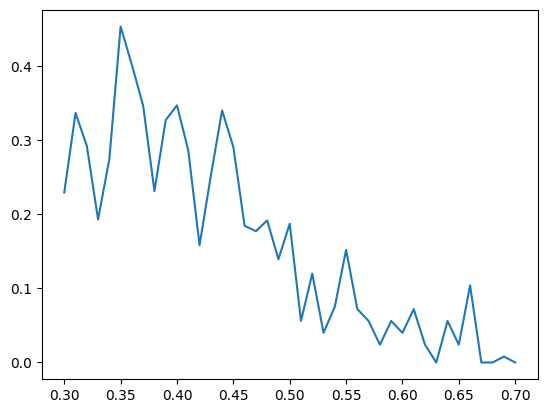

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from god_class import DictHandler
from baseline3 import Baseline3
np.random.seed(70)
dict_handler = DictHandler('GodClassRefactorDictionary.csv')
good_classes = dict_handler.get_classes()
test_cases = [good_classes[10], good_classes[30], good_classes[50], good_classes[70], good_classes[90]]
result = []
for i in tqdm(range(41)):
    p = 0.3 + 0.01 * i
    m_data = []
    for c in test_cases:
        baseline3 = Baseline3(c)
        baseline3.original_graph_to_chain(t=p)
        baseline3.original_chain_to_groups()
        m_data.append(baseline3.get_mojofm())
    result.append((p, sum(m_data) / len(m_data)))
x = [n[0] for n in result]
y = [n[1] for n in result]
plt.plot(x, y)
for r in result:
    print("(%.2f, %.2f)" % r, end='')

above is the process of parameter selection for the baseline. Note that LDA has a certain level of randomness. The method performs relatively well at 0.36 on our data.